In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
df = pd.read_csv("iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [38]:
df['class'] = df.Species.replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})

In [43]:
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
5      6            5.4           3.9            1.7           0.4   
6      7            4.6           3.4            1.4           0.3   
7      8            5.0           3.4            1.5           0.2   
8      9            4.4           2.9            1.4           0.2   
9     10            4.9           3.1            1.5           0.1   
10    11            5.4           3.7            1.5           0.2   
11    12            4.8           3.4            1.6           0.2   
12    13            4.8           3.0            1.4           0.1   
13    14            

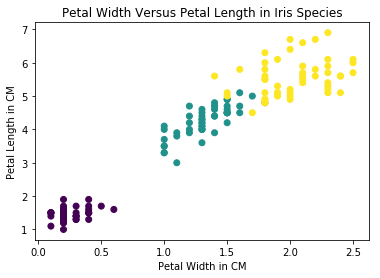

In [39]:
x = df.PetalWidthCm
y = df.PetalLengthCm
plt.scatter(x,y, c=df['class'])
plt.title("Petal Width Versus Petal Length in Iris Species")
plt.xlabel("Petal Width in CM")
plt.ylabel("Petal Length in CM")
plt.show()

In [40]:
randomized_df = df.sample(frac=1)
split = int((0.8)*len(df))
train = randomized_df.iloc[0:split, :]
test = randomized_df.iloc[split:, :]

In [44]:
randomized_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,class
77,78,6.7,3.0,5.0,1.7,Iris-versicolor,1
43,44,5.0,3.5,1.6,0.6,Iris-setosa,0
10,11,5.4,3.7,1.5,0.2,Iris-setosa,0
95,96,5.7,3.0,4.2,1.2,Iris-versicolor,1
71,72,6.1,2.8,4.0,1.3,Iris-versicolor,1
81,82,5.5,2.4,3.7,1.0,Iris-versicolor,1
49,50,5.0,3.3,1.4,0.2,Iris-setosa,0
119,120,6.0,2.2,5.0,1.5,Iris-virginica,2
98,99,5.1,2.5,3.0,1.1,Iris-versicolor,1
75,76,6.6,3.0,4.4,1.4,Iris-versicolor,1


In [41]:

train_X = train.iloc[:, 1:5]
train_y = train.iloc[:, 6]
test_X = test.iloc[:, 1:5]
test_y = test.iloc[:, 6]


In [42]:
classifier = KNeighborsClassifier()
classifier.fit(train_X, train_y)
predictions = classifier.predict(test_X)
print("Accuracy on test dataset:", round(sum(predictions == test_y)/(len(test_y)),2))

Accuracy on test dataset: 1.0
